In [1]:
# import libraries
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
iris = load_iris() # load dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#### Standardize Features

In [3]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris_df)
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris.feature_names)

# Apply PCA for dimension reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_iris_df)
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])


#### Cluster data using K-means and plot 

c:\Users\chidi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


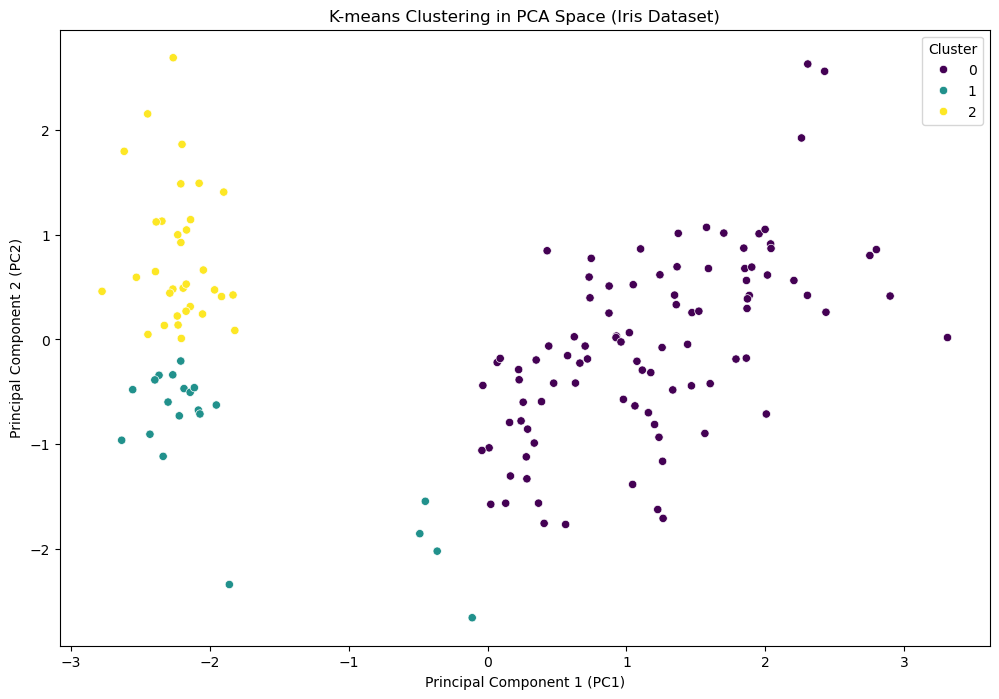

In [5]:
# Perform K-means clustering on the PCA components
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_df)
pca_df['Cluster'] = kmeans_pca.labels_

# Visualize the clusters in the PCA space
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-means Clustering in PCA Space (Iris Dataset)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()